In [2]:
import json

In [4]:
pip install zstandard

Note: you may need to restart the kernel to use updated packages.


In [5]:
import zstandard
import io

In [6]:
with open("jobs_comments.zst", 'rb') as fh:
    dctx = zstandard.ZstdDecompressor()
    stream_reader = dctx.stream_reader(fh)
    text_stream = io.TextIOWrapper(stream_reader, encoding='utf-8')
    for line in text_stream:
        print(line)
        break

{"subreddit":"jobs","controversiality":0,"author":"apotheon","link_id":"t3_6daqo","gilded":0,"subreddit_id":"t5_2qhnd","author_flair_css_class":null,"archived":true,"ups":3,"distinguished":null,"edited":false,"score_hidden":false,"downs":0,"retrieved_on":1425842846,"score":3,"body":"All through that entire article, the thought that kept occurring to me was \"These characteristics are neither particular, nor necessary, to brilliance.\"  What the guy describes in the article isn't brilliance -- it's con men, who excel at *pretending* brilliance.","author_flair_text":null,"name":"t1_c03ptss","created_utc":"1208197182","parent_id":"t3_6daqo","id":"c03ptss"}



In [7]:
with open("jobs_submissions.zst", 'rb') as fh:
    dctx = zstandard.ZstdDecompressor()
    stream_reader = dctx.stream_reader(fh)
    text_stream = io.TextIOWrapper(stream_reader, encoding='utf-8')
    for line in text_stream:
        print(line)
        break

{"archived":true,"author":"Escafane","author_flair_background_color":null,"author_flair_css_class":null,"author_flair_richtext":[],"author_flair_text":null,"author_flair_text_color":null,"author_flair_type":"text","brand_safe":true,"can_gild":true,"contest_mode":false,"created_utc":1206449902,"distinguished":null,"domain":"digitaldigressions.net","edited":false,"gilded":0,"hidden":false,"hide_score":false,"id":"6dapj","is_crosspostable":true,"is_reddit_media_domain":false,"is_self":false,"is_video":false,"link_flair_css_class":null,"link_flair_richtext":[],"link_flair_text":null,"link_flair_text_color":"dark","link_flair_type":"text","locked":false,"media":null,"media_embed":{},"no_follow":true,"num_comments":0,"num_crossposts":0,"over_18":false,"parent_whitelist_status":"all_ads","permalink":"\/r\/jobs\/comments\/6dapj\/the_dilemma_of_recruitment\/","retrieved_on":1522687655,"rte_mode":"markdown","score":1,"secure_media":null,"secure_media_embed":{},"selftext":"","send_replies":true,"

In [8]:
pip install wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /Users/loricai/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/loricai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


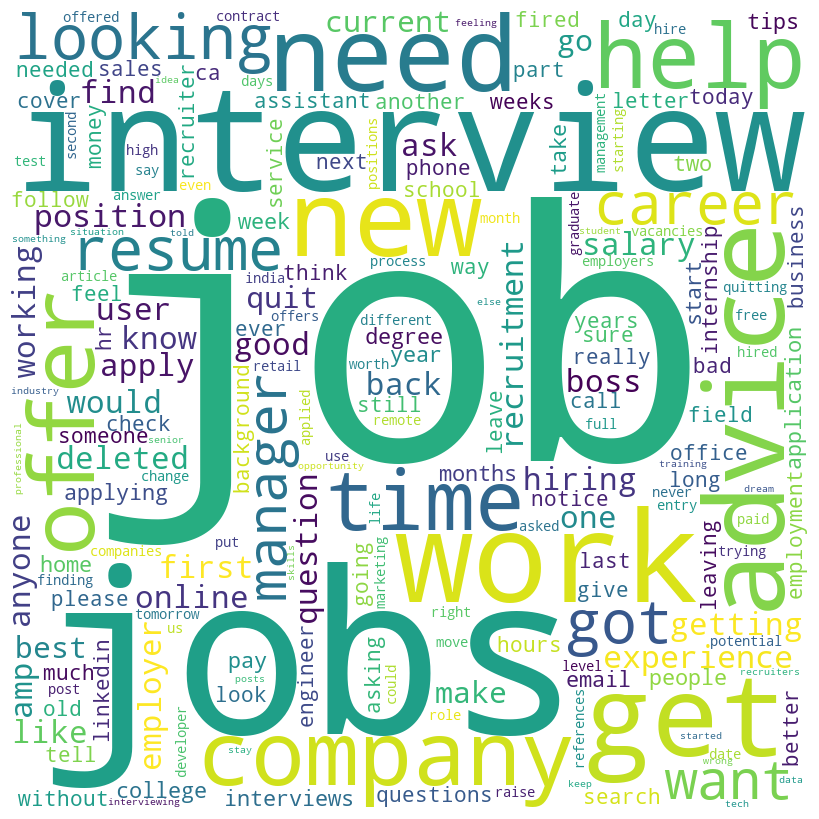

In [9]:
import io
import json
import zstandard
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

with open("jobs_submissions.zst", 'rb') as fh:
    dctx = zstandard.ZstdDecompressor()
    stream_reader = dctx.stream_reader(fh)
    text_stream = io.TextIOWrapper(stream_reader, encoding='utf-8')

    counter = Counter()
    for line in text_stream:       
        data = json.loads(line)
        words = nltk.word_tokenize(data['title'])       
        counter.update(word.lower() for word in words if word.isalpha() and word.lower() not in stopwords)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(counter)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


year 2018-2023

[nltk_data] Downloading package punkt to /Users/loricai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/loricai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


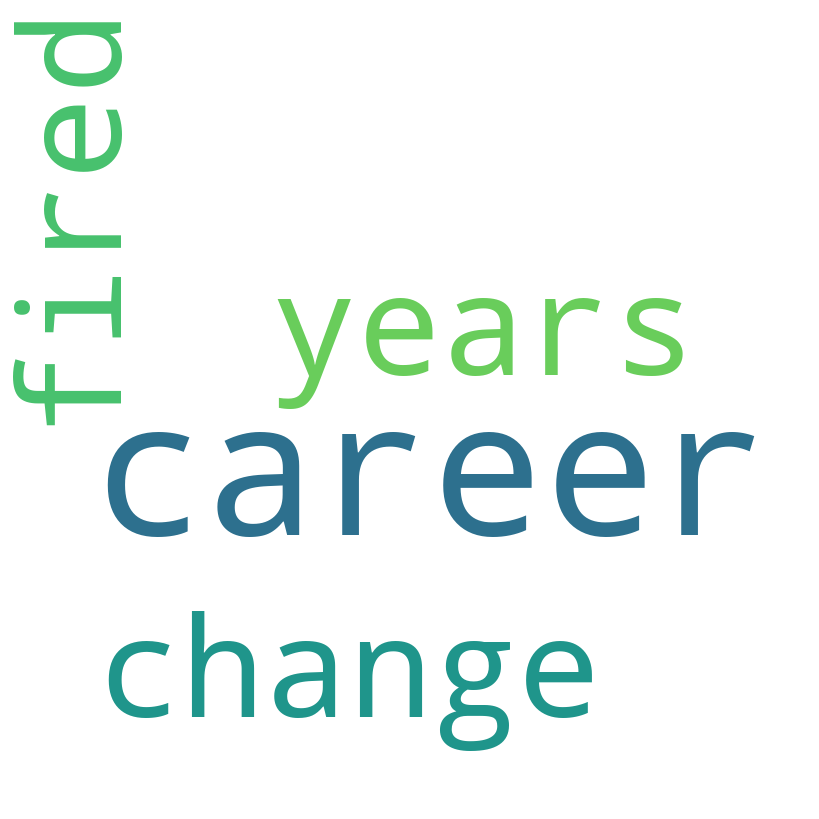

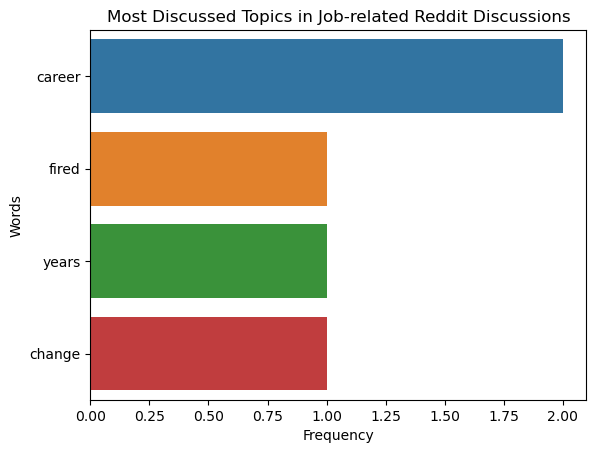

In [23]:
import io
import json
import zstandard
import nltk
import datetime
import time
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sns
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

start_year = 2018
end_year = 2023

start_time = time.mktime(datetime.datetime(start_year, 1, 1).timetuple())
end_time = time.mktime(datetime.datetime(end_year, 12, 31, 23, 59, 59).timetuple())

with open("jobs_submissions.zst", 'rb') as fh:
    dctx = zstandard.ZstdDecompressor()
    stream_reader = dctx.stream_reader(fh)
    text_stream = io.TextIOWrapper(stream_reader, encoding='utf-8')

    counter = Counter()
    for line in text_stream:
        data = json.loads(line)
        created_utc = float(data['created_utc'])  # convert to float here
    
    if start_time <= created_utc <= end_time:
        words = nltk.word_tokenize(data['title'])
        counter.update(word.lower() for word in words if word.isalpha() and word.lower() not in stopwords)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(counter)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

most_common = counter.most_common(10)
words = [word for word, count in most_common]
counts = [count for word, count in most_common]
df = pd.DataFrame({'words': words, 'counts': counts})

sns.barplot(data=df, x='counts', y='words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Discussed Topics in Job-related Reddit Discussions')
plt.show()


In [14]:
with open('word_counts.txt', 'w') as f:
    for word, count in counter.items():
        f.write(f"{word}: {count}\n")

[nltk_data] Downloading package punkt to /Users/loricai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/loricai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


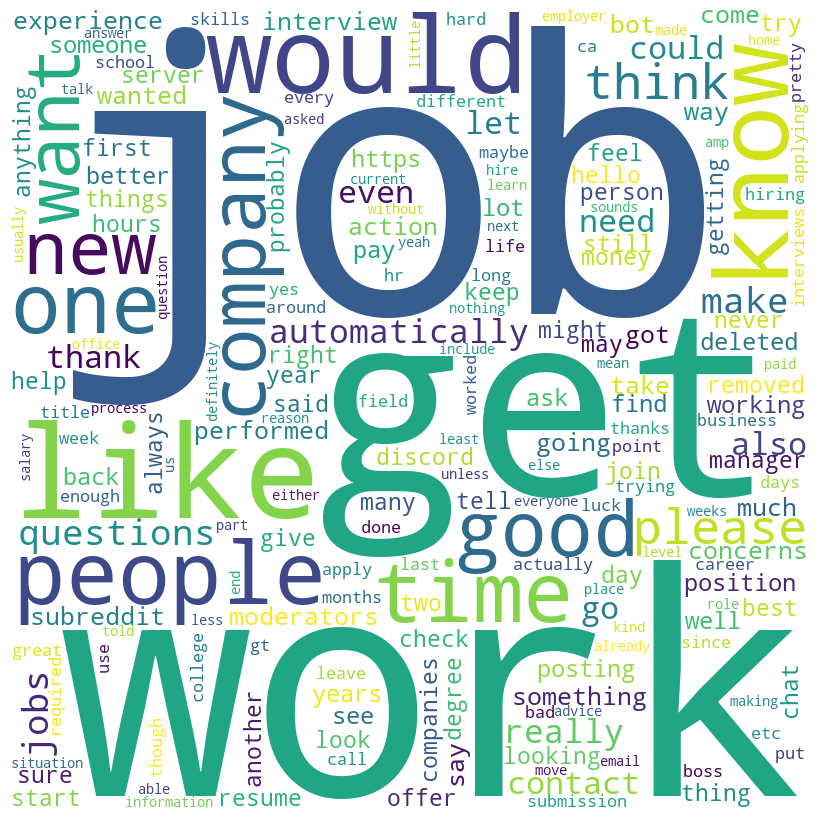

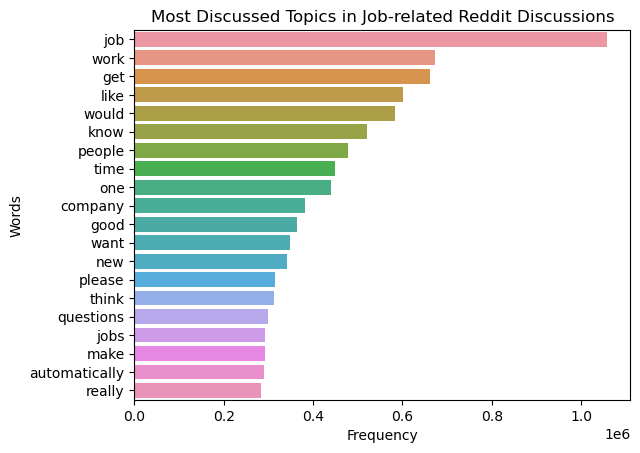

In [11]:
import io
import json
import zstandard
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sns
import pandas as pd

# Download the English stopwords from nltk
nltk.download('punkt')
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

with open("jobs_comments.zst", 'rb') as fh:
    dctx = zstandard.ZstdDecompressor()
    stream_reader = dctx.stream_reader(fh)
    text_stream = io.TextIOWrapper(stream_reader, encoding='utf-8')

    counter = Counter()
    for line in text_stream:
        data = json.loads(line)

        words = nltk.word_tokenize(data['body'])

        counter.update(word.lower() for word in words if word.isalpha() and word.lower() not in stopwords)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(counter)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

most_common = counter.most_common(20)

words = [word for word, count in most_common]
counts = [count for word, count in most_common]

df = pd.DataFrame({'words': words, 'counts': counts})

sns.barplot(data=df, x='counts', y='words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Discussed Topics in Job-related Reddit Discussions')
plt.show()


[nltk_data] Downloading package punkt to /Users/loricai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/loricai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


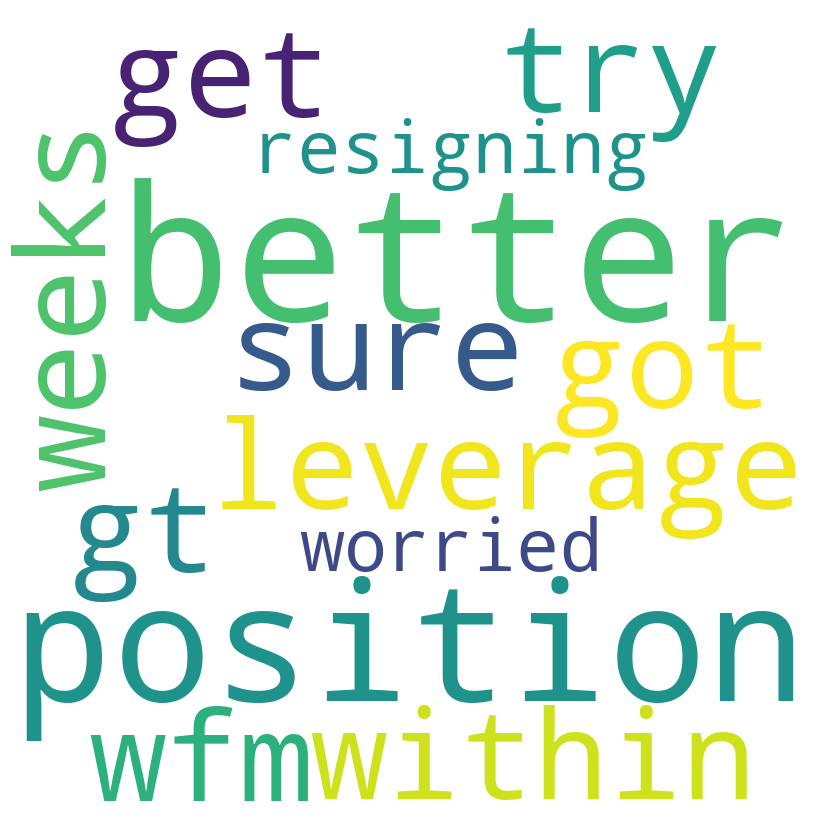

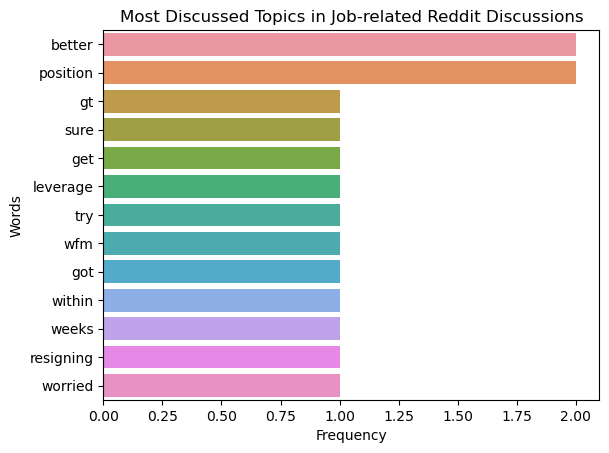

In [2]:
import io
import json
import zstandard
import nltk
import datetime
import time
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sns
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

start_year = 2018
end_year = 2023

start_time = time.mktime(datetime.datetime(start_year, 1, 1).timetuple())
end_time = time.mktime(datetime.datetime(end_year, 12, 31, 23, 59, 59).timetuple())

with open("jobs_comments.zst", 'rb') as fh:
    dctx = zstandard.ZstdDecompressor()
    stream_reader = dctx.stream_reader(fh)
    text_stream = io.TextIOWrapper(stream_reader, encoding='utf-8')

    counter = Counter()
    for line in text_stream:
        data = json.loads(line)
        created_utc = float(data['created_utc']) 
        
    if start_time <= created_utc <= end_time:
        words = nltk.word_tokenize(data['body'])
        counter.update(word.lower() for word in words if word.isalpha() and word.lower() not in stopwords)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(counter)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

most_common = counter.most_common(50)
words = [word for word, count in most_common]
counts = [count for word, count in most_common]
df = pd.DataFrame({'words': words, 'counts': counts})

sns.barplot(data=df, x='counts', y='words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Discussed Topics in Job-related Reddit Discussions')
plt.show()


In [3]:
#2020 submissions

In [14]:
import io
import zstandard
import json
from datetime import datetime

dctx = zstandard.ZstdDecompressor()

with open("jobs_submissions.zst", 'rb') as fh:
    stream_reader = dctx.stream_reader(fh)
    text_stream = io.TextIOWrapper(stream_reader, encoding='utf-8')
    
    with open("2020_submission_titles.txt", "w") as out_file:
        for line in text_stream:
            submission = json.loads(line)

            timestamp_str = submission.get('created_utc', "0")
            
            try:
                timestamp = int(timestamp_str)
                creation_year = datetime.fromtimestamp(timestamp).year
            except ValueError:
                continue

            if creation_year == 2020:
                title = submission.get('title', 'N/A')
                out_file.write(title + "\n")


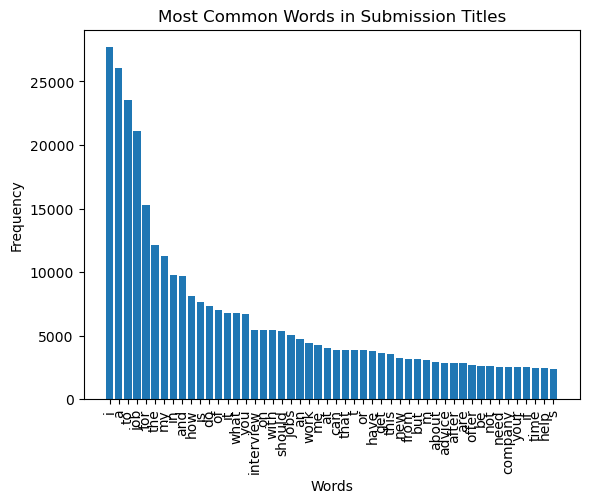

In [9]:
import matplotlib.pyplot as plt
from collections import Counter
import re

with open('2020_submission_titles.txt', 'r') as file:
    titles = file.read().lower()
    words = re.findall(r'\b\w+\b', titles)
    word_count = Counter(words)

common_words = word_count.most_common(50)

words, counts = zip(*common_words)  
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Submission Titles')
plt.xticks(rotation='vertical')
plt.show()


In [13]:
import zstandard
import json
import io
from datetime import datetime

keywords = ["lost", "laid off", "unemployment","crash","crisis","deflation","drop","failure","inactivity","inflation","recession","bad times","bear market","big trouble","hard times","rainy days"]

count = 0  
with open("jobs_submissions.zst", 'rb') as fh:
    dctx = zstandard.ZstdDecompressor()
    stream_reader = dctx.stream_reader(fh)
    text_stream = io.TextIOWrapper(stream_reader, encoding='utf-8')

    with open('2020_filtered_submission_titles.txt', 'w') as outfile:
        for line in text_stream:
            submission = json.loads(line)
            title = submission.get('title', '').lower()
            
            if any(keyword in title for keyword in keywords):
                timestamp = int(submission.get('created_utc', 0))
                creation_year = datetime.utcfromtimestamp(timestamp).year

                if creation_year == 2020:
                    outfile.write(title + '\n')
                    count += 1  

print(f'Total matching submissions in 2020: {count}') 


Total matching submissions in 2020: 1279


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/loricai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


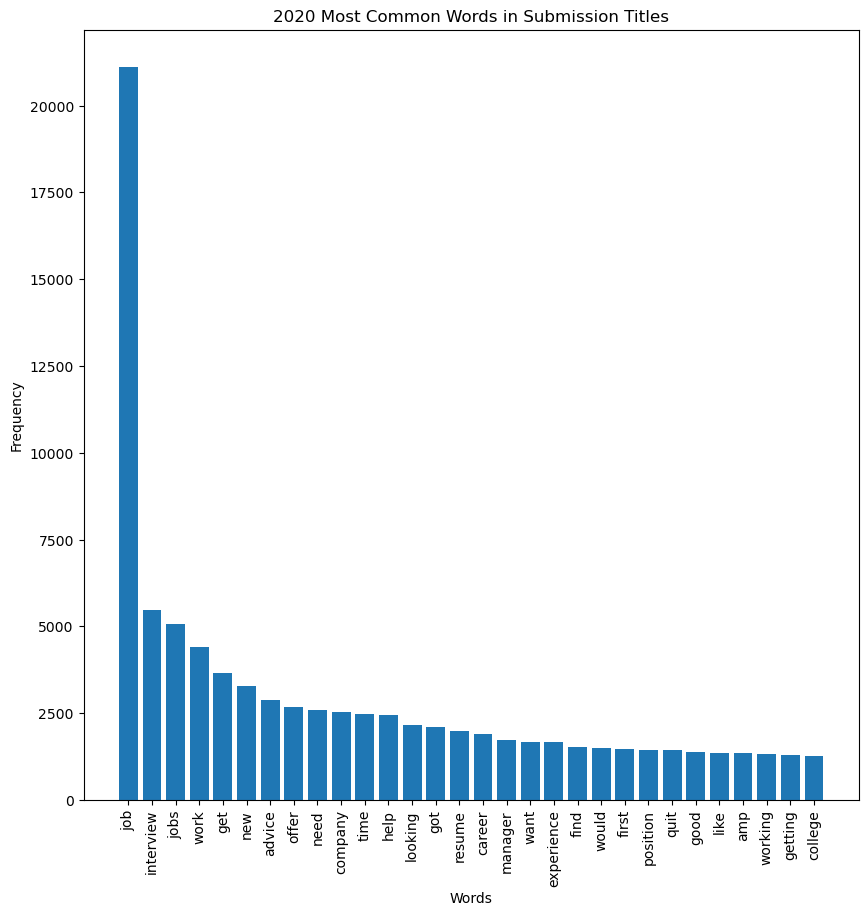

In [23]:
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

with open('2020_submission_titles.txt', 'r') as file:
    titles = file.read().lower()
    words = re.findall(r'\b\w+\b', titles)
    
    filtered_words = [word for word in words if word not in stop_words]
    
    word_count = Counter(filtered_words)

common_words = word_count.most_common(30)

words, counts = zip(*common_words)  
plt.figure(figsize=(10,10))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('2020 Most Common Words in Submission Titles')
plt.xticks(rotation='vertical')
plt.show()

In [16]:
import zstandard
import json
import io
from datetime import datetime

keywords = ["lost", "laid off", "unemployment","crash","crisis","deflation","drop","failure","inactivity","inflation","recession","bad times","bear market","big trouble","hard times","rainy days"]

count = 0  

with open("jobs_comments.zst", 'rb') as fh:
    dctx = zstandard.ZstdDecompressor()
    stream_reader = dctx.stream_reader(fh)
    text_stream = io.TextIOWrapper(stream_reader, encoding='utf-8')

    with open('2020_filtered_comments_body.txt', 'w') as outfile:
        for line in text_stream:
            submission = json.loads(line)
            title = submission.get('body', '').lower()
            
            
            if any(keyword in title for keyword in keywords):
                timestamp = int(submission.get('created_utc', 0))
                creation_year = datetime.utcfromtimestamp(timestamp).year

                if creation_year == 2020:
                    outfile.write(title + '\n')
                    count += 1  

print(f'Total matching comments in 2020: {count}') 

Total matching comments in 2020: 9627


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/loricai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


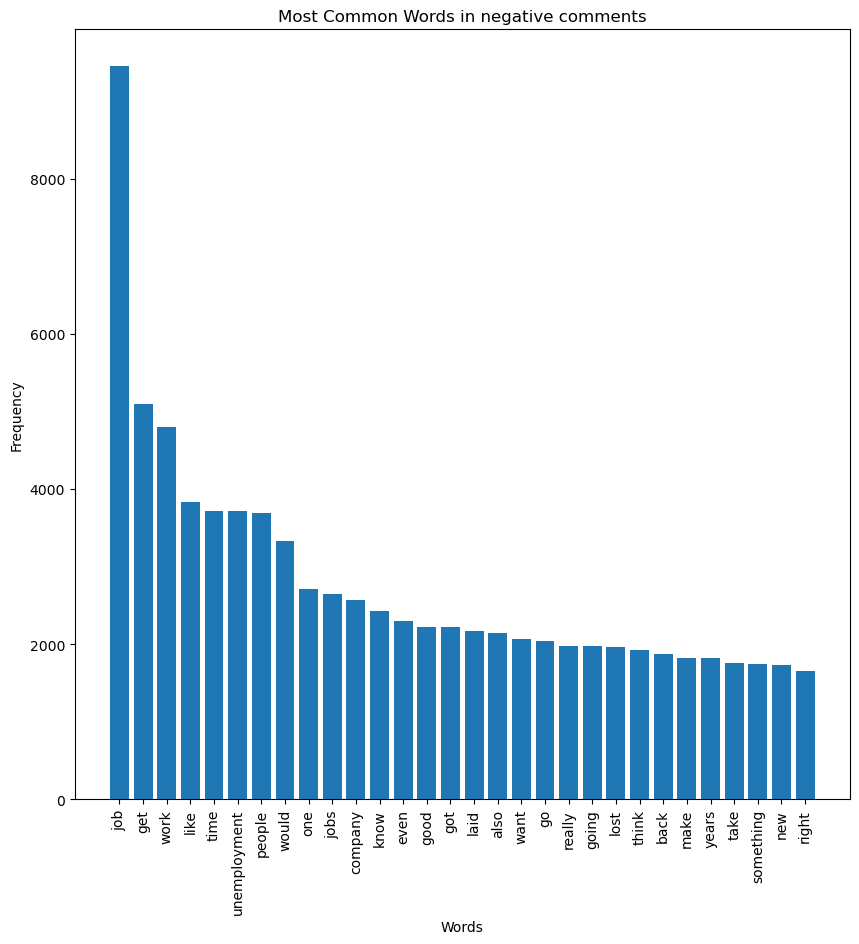

In [24]:
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

with open('2020_filtered_comments_body.txt', 'r') as file:
    titles = file.read().lower()
    words = re.findall(r'\b\w+\b', titles)
    
    filtered_words = [word for word in words if word not in stop_words]
    
    word_count = Counter(filtered_words)

common_words = word_count.most_common(30)

words, counts = zip(*common_words) 
plt.figure(figsize=(10,10))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in negative comments')
plt.xticks(rotation='vertical')
plt.show()


The latest submissions

In [30]:
import zstandard
import json
import io

with open("jobs_submissions.zst", 'rb') as fh:
    dctx = zstandard.ZstdDecompressor()
    stream_reader = dctx.stream_reader(fh)
    text_stream = io.TextIOWrapper(stream_reader, encoding='utf-8')
    
    submissions = []
    
    for line in text_stream:
        submission = json.loads(line)
        submission['created_utc'] = int(submission.get('created_utc', 0))
        submissions.append(submission)
    
sorted_submissions = sorted(submissions, key=lambda x: x['created_utc'], reverse=True)

latest_submissions = sorted_submissions[:3000]

with open("latest_jobs_submissions.json", 'w') as outfile:
    json.dump(latest_submissions, outfile)

